In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegressionCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report,roc_auc_score
from sklearn.metrics import RocCurveDisplay
from imblearn.under_sampling import RandomUnderSampler

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [40]:
def split_train_test(df):
    train_set, test_set = train_test_split(df, test_size=0.25, random_state=72)
    train_set_x=train_set.drop(columns=['Class'])
    train_set_y= train_set['Class']
    test_set_x=test_set.drop(columns=['Class'])
    test_set_y= test_set['Class']
    return train_set_x, train_set_y, test_set_x, test_set_y

def ver_metricas(set, predict_set):
   print('Recall score:', recall_score(set, predict_set))
   print('Precision score:', precision_score(set, predict_set))
   print('F1 score:', f1_score(set, predict_set))
   print('Accuracy score:', accuracy_score(set, predict_set))
   print('------------------------------------------------------')
   table=confusion_matrix(set, predict_set)
   sns.heatmap(table, cmap='Blues',annot=True,fmt='g')
   plt.xlabel('Predicted')
   plt.ylabel('True')
   print(classification_report(set, predict_set))

In [41]:
df=pd.read_csv('./shipping_ecommerce.csv')
df.head(5)

,Customer_care_calls,Customer_rating,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block,Mode_of_Shipment,Product_importance,Gender,Class
0,5,4,2,10,5395,A,Ship,medium,M,1
1,4,3,2,6,5867,F,Ship,medium,F,0
2,3,4,2,2,5957,D,Ship,medium,M,0
3,3,1,2,27,2551,D,Ship,medium,M,1
4,7,5,4,9,1329,B,Ship,medium,M,1


In [42]:
df['Weight_in_gms']=round(df['Weight_in_gms']/1000, 2)

In [43]:
df = pd.get_dummies(df, columns=["Warehouse_block","Mode_of_Shipment","Product_importance", "Gender"], dtype=int)
train_set_x, train_set_y, test_set_x, test_set_y=split_train_test(df)

In [54]:
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(train_set_x, train_set_y)

Regresión logística 

In [44]:
log_cv = LogisticRegressionCV(cv=5,scoring= 'roc_auc')
log_cv.fit(train_set_x, train_set_y)

LogisticRegressionCV(cv=5, scoring='roc_auc')

In [45]:
y_pred_log_cv = log_cv.predict(test_set_x)
y_pred_proba_log_cv = log_cv.predict_proba(test_set_x)
roc_auc_score(test_set_y, y_pred_proba_log_cv[:, 1])

0.7076420125126388

Recall score: 0.6798539257455873
Precision score: 0.6856967464702272
F1 score: 0.6827628361858191
Accuracy score: 0.6225454545454545
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.53      0.54      0.53      1107
           1       0.69      0.68      0.68      1643

    accuracy                           0.62      2750
   macro avg       0.61      0.61      0.61      2750
weighted avg       0.62      0.62      0.62      2750



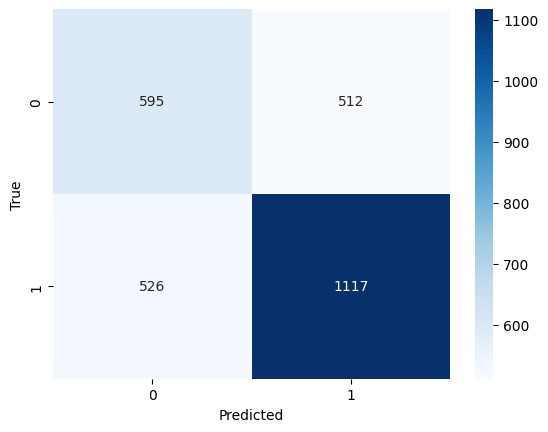

In [47]:
log_regression = LogisticRegression()
log_regression.fit(train_set_x, train_set_y)
log_reg_predict = log_regression.predict(test_set_x)
ver_metricas(test_set_y,log_reg_predict)

Recall score: 0.5234327449786975
Precision score: 0.8237547892720306
F1 score: 0.640119091924079
Accuracy score: 0.6483636363636364
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.54      0.83      0.66      1107
           1       0.82      0.52      0.64      1643

    accuracy                           0.65      2750
   macro avg       0.68      0.68      0.65      2750
weighted avg       0.71      0.65      0.65      2750



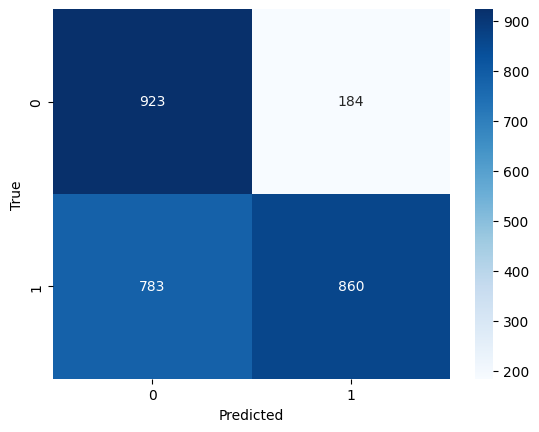

In [55]:
log_regression_ = LogisticRegression()
log_regression_.fit(X_resampled, y_resampled)
log_reg_predict_ = log_regression_.predict(test_set_x)
ver_metricas(test_set_y,log_reg_predict_)

Decision tree

Recall score: 0.6853317102860621
Precision score: 0.706842435655995
F1 score: 0.6959208899876391
Accuracy score: 0.6421818181818182
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.55      0.58      0.57      1107
           1       0.71      0.69      0.70      1643

    accuracy                           0.64      2750
   macro avg       0.63      0.63      0.63      2750
weighted avg       0.64      0.64      0.64      2750



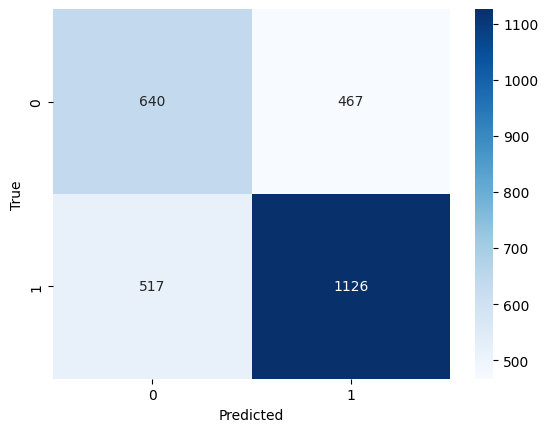

In [49]:
tree = DecisionTreeClassifier(random_state=3) 
tree.fit(train_set_x, train_set_y)
tree_predict_y= tree.predict(test_set_x)
ver_metricas(test_set_y,tree_predict_y)

Recall score: 0.6305538648813147
Precision score: 0.7270175438596491
F1 score: 0.6753585397653195
Accuracy score: 0.6378181818181818
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.54      0.65      0.59      1107
           1       0.73      0.63      0.68      1643

    accuracy                           0.64      2750
   macro avg       0.63      0.64      0.63      2750
weighted avg       0.65      0.64      0.64      2750



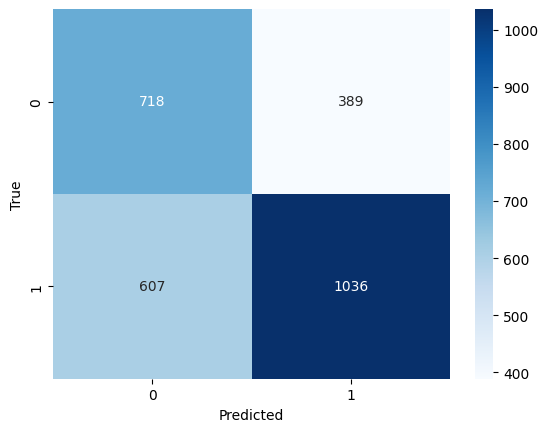

In [50]:
random_forest=RandomForestClassifier()
random_forest.fit(train_set_x, train_set_y)
randon_forest_predict=random_forest.predict(test_set_x)
ver_metricas(test_set_y,randon_forest_predict)

Random forest 

In [51]:
random_forest_cv = RandomForestClassifier(random_state=3)

params = { "criterion" : ["gini", "entropy", "log_loss"], 
               "min_samples_leaf" : [1, 5, 10], 
               "min_samples_split" : [2, 4, 10, 12, 16], 
               "n_estimators": [10,20, 50] }


cv_random_forest = RandomizedSearchCV(estimator=random_forest_cv, param_distributions=params, scoring="f1", cv=5, random_state=3,n_iter=15)
cv_random_forest.fit(train_set_x, train_set_y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=3),
                   n_iter=15,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'min_samples_leaf': [1, 5, 10],
                                        'min_samples_split': [2, 4, 10, 12, 16],
                                        'n_estimators': [10, 20, 50]},
                   random_state=3, scoring='f1')

In [52]:
print(cv_random_forest.best_params_)
print(cv_random_forest.best_score_)

{'n_estimators': 50, 'min_samples_split': 4, 'min_samples_leaf': 1, 'criterion': 'gini'}
0.7006432088262106


Recall score: 0.6506390748630554
Precision score: 0.7222972972972973
F1 score: 0.6845981428113993
Accuracy score: 0.6418181818181818
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.55      0.63      0.59      1107
           1       0.72      0.65      0.68      1643

    accuracy                           0.64      2750
   macro avg       0.64      0.64      0.64      2750
weighted avg       0.65      0.64      0.64      2750



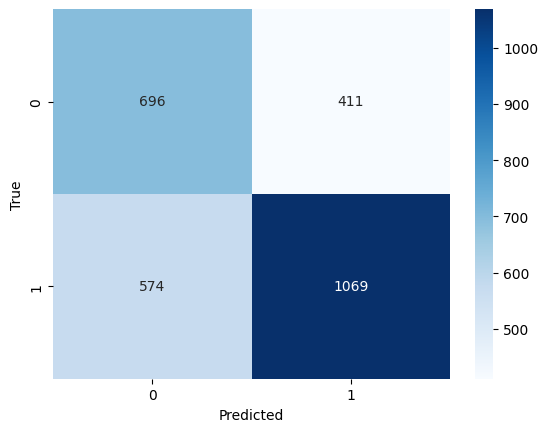

In [53]:
random_forest_best = RandomForestClassifier(random_state=3,n_estimators= 10, min_samples_split=10, min_samples_leaf= 1, criterion= 'gini')
random_forest_best.fit(train_set_x, train_set_y)
random_forest_best_predict= random_forest_best.predict(test_set_x)
ver_metricas(test_set_y, random_forest_best_predict)